In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer

In [2]:
#reading the dataset
raw_data=pd.read_csv("E:/DataSet/amazon_alexa.tsv",sep="\t")
raw_data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
#using only the review column
data=raw_data.iloc[:,raw_data.columns=='verified_reviews']
data

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


In [4]:
#cleaning the text
reviews=[x.strip() for x in data['verified_reviews']] #removes line spacing
reviews=[x for x in reviews if x] #removes empty fields
reviews

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [5]:
text=' '.join(reviews) #joining the list in a paragraph
text

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [6]:
#removing punctuation
text_cleaned=text.translate(str.maketrans('','',string.punctuation))
text_cleaned

'Love my Echo Loved it Sometimes while playing a game you can answer a question correctly but Alexa says you got it wrong and answers the same as you  I like being able to turn lights on and off while away from home I have had a lot of fun with this thing My 4 yr old learns about dinosaurs i control the lights and play games like categories Has nice sound when playing music as well Music I received the echo as a gift I needed another Bluetooth or something to play music easily accessible and found this smart speaker Can’t wait to see what else it can do Without having a cellphone I cannot use many of her features I have an iPad but do not see that of any use  It IS a great alarm  If u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herIt is fun to ask random questions to hear her response  She does not seem to be very smartbon politics yet I think this is the 5th one Ive purchased Im working on getting one in every room o

In [7]:
#tokenization
text_tokens=word_tokenize(text_cleaned)
text_tokens[0:500]

['Love',
 'my',
 'Echo',
 'Loved',
 'it',
 'Sometimes',
 'while',
 'playing',
 'a',
 'game',
 'you',
 'can',
 'answer',
 'a',
 'question',
 'correctly',
 'but',
 'Alexa',
 'says',
 'you',
 'got',
 'it',
 'wrong',
 'and',
 'answers',
 'the',
 'same',
 'as',
 'you',
 'I',
 'like',
 'being',
 'able',
 'to',
 'turn',
 'lights',
 'on',
 'and',
 'off',
 'while',
 'away',
 'from',
 'home',
 'I',
 'have',
 'had',
 'a',
 'lot',
 'of',
 'fun',
 'with',
 'this',
 'thing',
 'My',
 '4',
 'yr',
 'old',
 'learns',
 'about',
 'dinosaurs',
 'i',
 'control',
 'the',
 'lights',
 'and',
 'play',
 'games',
 'like',
 'categories',
 'Has',
 'nice',
 'sound',
 'when',
 'playing',
 'music',
 'as',
 'well',
 'Music',
 'I',
 'received',
 'the',
 'echo',
 'as',
 'a',
 'gift',
 'I',
 'needed',
 'another',
 'Bluetooth',
 'or',
 'something',
 'to',
 'play',
 'music',
 'easily',
 'accessible',
 'and',
 'found',
 'this',
 'smart',
 'speaker',
 'Can',
 '’',
 't',
 'wait',
 'to',
 'see',
 'what',
 'else',
 'it',
 'can',

In [8]:
text_tokens_lower=[]
for word in text_tokens:
    text_tokens_lower.append(word.lower())
text_tokens_lower[0:50]

['love',
 'my',
 'echo',
 'loved',
 'it',
 'sometimes',
 'while',
 'playing',
 'a',
 'game',
 'you',
 'can',
 'answer',
 'a',
 'question',
 'correctly',
 'but',
 'alexa',
 'says',
 'you',
 'got',
 'it',
 'wrong',
 'and',
 'answers',
 'the',
 'same',
 'as',
 'you',
 'i',
 'like',
 'being',
 'able',
 'to',
 'turn',
 'lights',
 'on',
 'and',
 'off',
 'while',
 'away',
 'from',
 'home',
 'i',
 'have',
 'had',
 'a',
 'lot',
 'of',
 'fun']

In [9]:
len(text_tokens)

80526

In [18]:
#importing the stopwrods provided
with open("E:/DataSet/stop.txt","r") as file:
    all_words=file.read().replace("\n"," ")
stopword=all_words.split(" ")
print(stopword)

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

In [14]:
#importing more stopwords
from nltk.corpus import stopwords
more_stopwords=stopwords.words('english')
more_stopwords.append('the')

In [15]:
for word in more_stopwords:
    if word not in stopword:
        stopword.append(word)

In [16]:
#removing the stopwords
no_stop_tokens=[word for word in text_tokens_lower if not word in stopword]
print(no_stop_tokens)

['love', 'echo', 'loved', 'playing', 'game', 'answer', 'question', 'correctly', 'alexa', 'wrong', 'answers', 'turn', 'lights', 'home', 'lot', 'fun', 'thing', '4', 'yr', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'categories', 'nice', 'sound', 'playing', 'music', 'music', 'received', 'echo', 'gift', 'needed', 'bluetooth', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', '’', 'wait', 'cellphone', 'features', 'ipad', 'great', 'alarm', 'deaf', 'hear', 'alarm', 'bedroom', 'living', 'room', 'reason', 'herit', 'fun', 'random', 'questions', 'hear', 'response', 'smartbon', 'politics', '5th', 'ive', 'purchased', 'im', 'working', 'room', 'house', 'features', 'offer', 'specifily', 'playing', 'music', 'echos', 'controlling', 'lights', 'house', 'great', 'love', '’', 'listened', 'songs', '’', 'heard', 'childhood', 'news', 'weather', 'information', '’', 'great', '85', 'year', 'dad', 'talks', 'constantly', 'love', 'learning', 'knew', 'things', 'eveyday', 'figuring

In [19]:
len(no_stop_tokens)

31540

In [20]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(no_stop_tokens))
print(doc)

love echo loved playing game answer question correctly alexa wrong answers turn lights home lot fun thing 4 yr learns dinosaurs control lights play games categories nice sound playing music music received echo gift needed bluetooth play music easily accessible found smart speaker ’ wait cellphone features ipad great alarm deaf hear alarm bedroom living room reason herit fun random questions hear response smartbon politics 5th ive purchased im working room house features offer specifily playing music echos controlling lights house great love ’ listened songs ’ heard childhood news weather information ’ great 85 year dad talks constantly love learning knew things eveyday figuring works easy understand make laugh times purchased mother knee problems give fast didshe enjoys big things doalexa play song time cook love love love expected love wife hates happy purchase great speaker easy set alexa couple days lot fun toy household member learn featues benefits love size 2nd generation echo im

In [21]:
#lemmatization
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['love', 'echo', 'love', 'playing', 'game', 'answer', 'question', 'correctly', 'alexa', 'wrong', 'answer', 'turn', 'light', 'home', 'lot', 'fun', 'thing', '4', 'yr', 'learn', 'dinosaur', 'control', 'light', 'play', 'game', 'category', 'nice', 'sound', 'play', 'music', 'music', 'receive', 'echo', 'gift', 'need', 'bluetooth', 'play', 'music', 'easily', 'accessible', 'find', 'smart', 'speaker', "'", 'wait', 'cellphone', 'feature', 'ipad', 'great', 'alarm', 'deaf', 'hear', 'alarm', 'bedroom', 'living', 'room', 'reason', 'herit', 'fun', 'random', 'question', 'hear', 'response', 'smartbon', 'politic', '5th', 'I', 've', 'purchase', 'I', 'm', 'work', 'room', 'house', 'feature', 'offer', 'specifily', 'play', 'music', 'echos', 'control', 'light', 'house', 'great', 'love', "'", 'listen', 'song', "'", 'hear', 'childhood', 'news', 'weather', 'information', "'", 'great', '85', 'year', 'dad', 'talk', 'constantly', 'love', 'learning', 'know', 'thing', 'eveyday', 'figure', 'work', 'easy', 'understand',

In [23]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)

{'love': 1820, 'echo': 1015, 'playing': 2226, 'game': 1289, 'answer': 284, 'question': 2365, 'correctly': 759, 'alexa': 231, 'wrong': 3339, 'turn': 3108, 'light': 1761, 'home': 1462, 'lot': 1814, 'fun': 1269, 'thing': 3006, 'yr': 3359, 'learn': 1742, 'dinosaur': 921, 'control': 737, 'play': 2224, 'category': 569, 'nice': 2009, 'sound': 2772, 'music': 1956, 'receive': 2416, 'gift': 1318, 'need': 1986, 'bluetooth': 459, 'easily': 1011, 'accessible': 149, 'find': 1208, 'smart': 2724, 'speaker': 2792, 'wait': 3243, 'cellphone': 581, 'feature': 1188, 'ipad': 1625, 'great': 1358, 'alarm': 223, 'deaf': 832, 'hear': 1425, 'bedroom': 415, 'living': 1787, 'room': 2530, 'reason': 2410, 'herit': 1442, 'random': 2386, 'response': 2499, 'smartbon': 2725, 'politic': 2250, '5th': 114, 've': 3200, 'purchase': 2350, 'work': 3319, 'house': 1481, 'offer': 2062, 'specifily': 2803, 'echos': 1022, 'listen': 1782, 'song': 2756, 'childhood': 611, 'news': 2003, 'weather': 3272, 'information': 1561, '85': 126, '

In [24]:
print(vectorizer.get_feature_names())

['072318', '10', '100', '1000', '100x', '1010', '1030pm', '11', '1100sf', '12', '1220', '129', '15', '150', '19', '1964', '1990', '1rst', '1st', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24ghz', '25', '29', '299', '2999', '2nd', '2or', '2original', '2package', '30', '300', '30so', '334', '34', '342nd', '3434', '34a34', '34alexa', '34alexa34', '34card34', '34certified', '34computer34', '34cycle', '34cycle34', '34dot34', '34drop', '34first', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34hub', '34i', '34im', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34never', '34outlet34', '34personal34', '34philips', '34play', '34second', '34she34', '34show', '34skills34', '34smart', '34smart34', '34sorry', '34spying34', '34tell', '34the', '34thick34', '34thing', '34things', '34this', '34thong', '34trouble', '34try', '34turn', '34visual34', '34wake34me', '34warehouse34', '34whats', '35', '360', '39', '399', '3999',

In [25]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(reviews)

In [26]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['34', 'alexa', 'all', 'also', 'am', 'amazon', 'an', 'and', 'are', 'as', 'at', 'be', 'better', 'bought', 'but', 'can', 'day', 'device', 'do', 'don', 'dot', 'easy', 'easy to', 'echo', 'echo dot', 'for', 'from', 'fun', 'get', 'good', 'great', 'had', 'has', 'have', 'home', 'if', 'in', 'in the', 'is', 'it', 'it is', 'just', 'like', 'love', 'love it', 'me', 'more', 'much', 'music', 'my', 'new', 'no', 'not', 'now', 'of', 'of the', 'on', 'one', 'or', 'other', 'our', 'out', 'play', 'prime', 'product', 'quality', 'really', 'set', 'set up', 'she', 'show', 'smart', 'so', 'sound', 'speaker', 'still', 'than', 'that', 'the', 'the echo', 'this', 'time', 'to', 'to set', 'to use', 'up', 'use', 'very', 'was', 'we', 'well', 'what', 'when', 'will', 'with', 'with the', 'work', 'works', 'would', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 3]
 ...
 [0 0 1 ... 0 0 3]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 0]]


In [32]:
# TFID Vectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['10', '100', '1st', '20', '2nd', '34alexa', '3rd', 'ability', 'absolutely', 'access', 'account', 'activate', 'adapter', 'add', 'addition', 'additional', 'advertise', 'ago', 'ai', 'alarm', 'alexa', 'alexia', 'amazed', 'amazing', 'amazon', 'annoying', 'answer', 'app', 'apple', 'arrive', 'ask', 'assistant', 'audible', 'audio', 'automation', 'awesome', 'back', 'bad', 'base', 'basic', 'bass', 'bathroom', 'battery', 'be', 'bed', 'bedroom', 'bedside', 'begin', 'big', 'birthday', 'bit', 'black', 'blast', 'blue', 'bluetooth', 'book', 'bose', 'box', 'brand', 'bridge', 'briefing', 'bring', 'build', 'bulb', 'button', 'buy', 'buying', 'cable', 'call', 'camera', 'capability', 'cell', 'change', 'channel', 'chat', 'cheap', 'check', 'choice', 'choose', 'clear', 'clock', 'close', 'color', 'command', 'communicate', 'compatible', 'complaint', 'completely', 'computer', 'connect', 'connected', 'connection', 'constantly', 'contact', 'continue', 'control', 'convenient', 'cook', 'cool', 'cord', 'correctly', '

In [33]:
lemma_para=' '.join(lemmas)
print(lemma_para)

love echo love playing game answer question correctly alexa wrong answer turn light home lot fun thing 4 yr learn dinosaur control light play game category nice sound play music music receive echo gift need bluetooth play music easily accessible find smart speaker ' wait cellphone feature ipad great alarm deaf hear alarm bedroom living room reason herit fun random question hear response smartbon politic 5th I ve purchase I m work room house feature offer specifily play music echos control light house great love ' listen song ' hear childhood news weather information ' great 85 year dad talk constantly love learning know thing eveyday figure work easy understand make laugh time purchase mother knee problem give fast didshe enjoy big thing doalexa play song time cook love love love expect love wife hate happy purchase great speaker easy set alexa couple day lot fun toy household member learn featue benefit love size 2nd generation echo improvement sound original echo shorter great fabric

In [34]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

### WordCloud

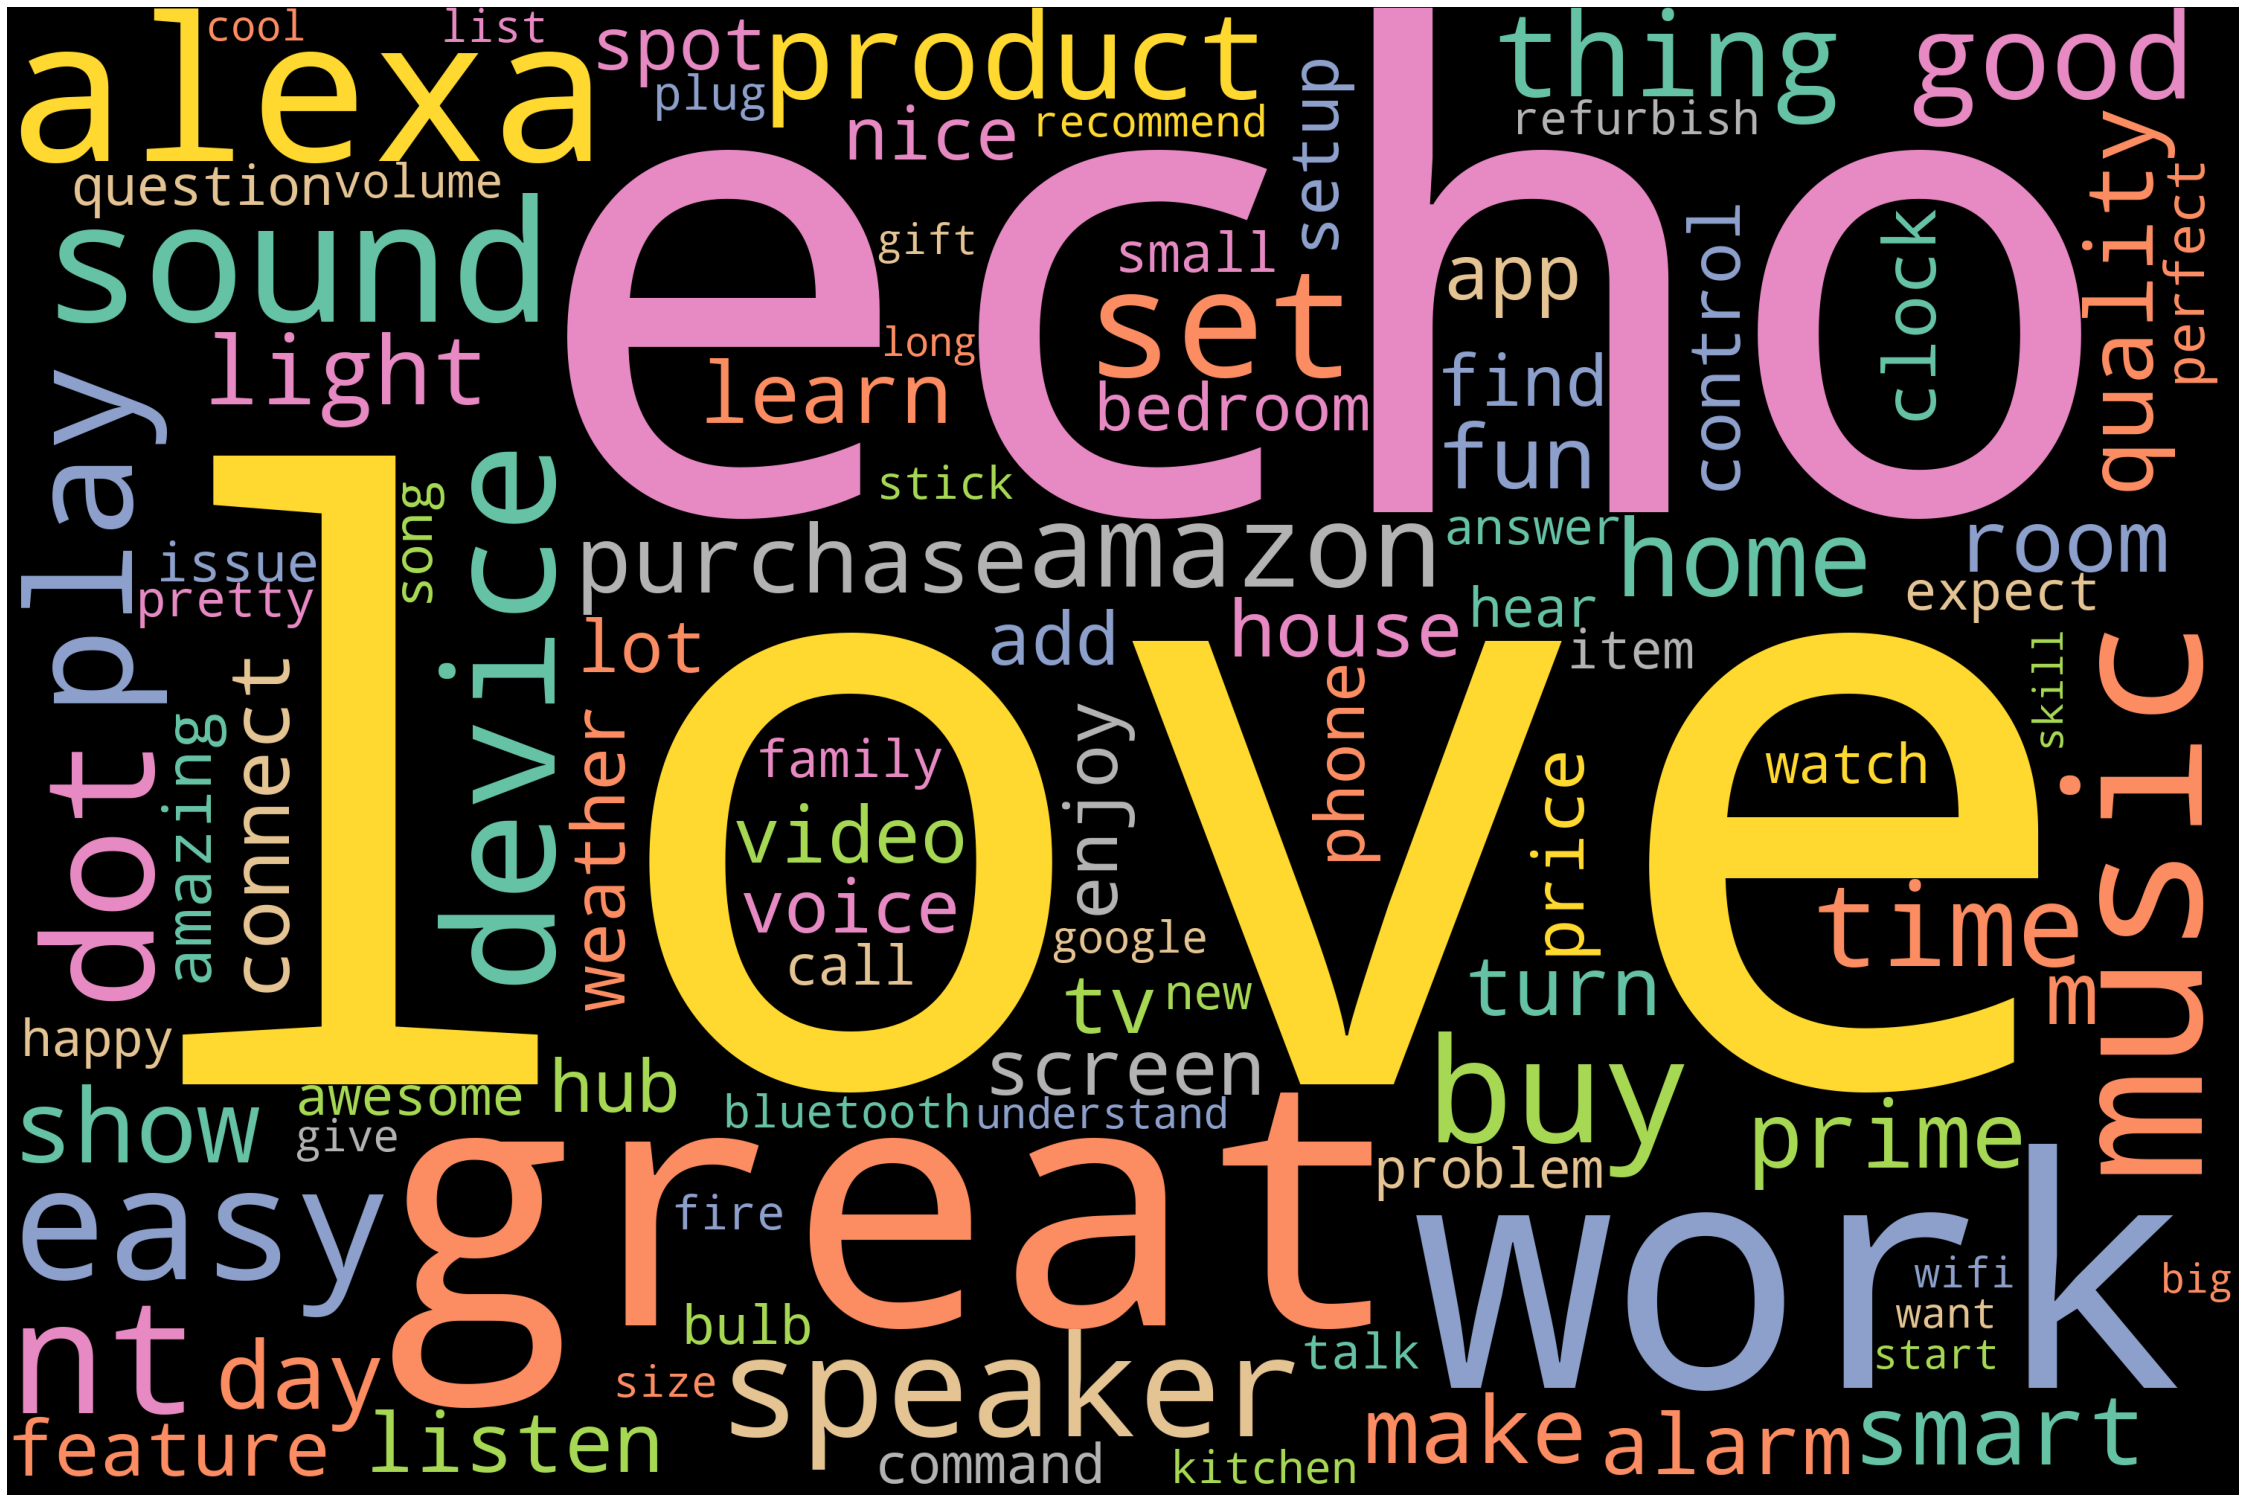

In [35]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords, collocations=False).generate(lemma_para)
# Plot
plot_cloud(wordcloud)

## Sentiment Analysis

In [37]:
# importing positive words given by assignment team
with open("E:/DataSet/positive-words.txt", "r") as file:
    all_words = file.read()

pos_words = all_words.split("\n")
print(pos_words[0:50])

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;', '; ', '; Opinion Lexicon: Positive', ';', '; This file contains a list of POSITIVE opinion words (or sentiment words).', ';', '; This file and the papers can all be downloaded from ', ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', '; If you use this list, please cite one of the following two papers:', ';', ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ', ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ', ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ', ';       Washington, USA, ', ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ', ';       and Comparing Opinions on the Web." Proceedings of the 14th ', ';       International World Wide Web conference (WWW-2005), May 10-14, ', ';       2005, Chiba, Japan.', ';', '; Notes: ', ';    1. The appearance of an opinion word in a senten

In [38]:
# getting the index from where the actual list starts
for i in range(len(pos_words)):
  if i < 100:
    print(f"index: {i} --- {pos_words[i]}")

index: 0 --- ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
index: 1 --- ; 
index: 2 --- ; Opinion Lexicon: Positive
index: 3 --- ;
index: 4 --- ; This file contains a list of POSITIVE opinion words (or sentiment words).
index: 5 --- ;
index: 6 --- ; This file and the papers can all be downloaded from 
index: 7 --- ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
index: 8 --- ;
index: 9 --- ; If you use this list, please cite one of the following two papers:
index: 10 --- ;
index: 11 --- ;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
index: 12 --- ;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
index: 13 --- ;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
index: 14 --- ;       Washington, USA, 
index: 15 --- ;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
index: 16 --- ;       and Comparing Opinions on the Web." Proceedings of the 14th 
in

In [39]:
# Positive words list
pos_words = pos_words[35:]
print(pos_words[:100])

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [40]:
# importing negative words given by assignment team
with open("E:/DataSet/negative-words.txt", "r", encoding="ISO-8859-1") as file:
    all_words = file.read()

neg_words = all_words.split("\n")

for i in range(len(neg_words)):
    if i < 100:
        print(f"index: {i} --- {neg_words[i]}")

index: 0 --- ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
index: 1 --- ; 
index: 2 --- ; Opinion Lexicon: Negative
index: 3 --- ;
index: 4 --- ; This file contains a list of NEGATIVE opinion words (or sentiment words).
index: 5 --- ;
index: 6 --- ; This file and the papers can all be downloaded from 
index: 7 --- ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
index: 8 --- ;
index: 9 --- ; If you use this list, please cite one of the following two papers:
index: 10 --- ;
index: 11 --- ;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
index: 12 --- ;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
index: 13 --- ;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
index: 14 --- ;       Washington, USA, 
index: 15 --- ;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
index: 16 --- ;       and Comparing Opinions on the Web." Proceedings of the 14th 


In [41]:
# Negative words
neg_words = neg_words[35:]
print(neg_words[:100])

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [42]:
# Making a dataframe of the reviews
reviews_df = pd.DataFrame(reviews, columns=["reviews"])
reviews_df

,reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3066,"Perfect for kids, adults and everyone in betwe..."
3067,"Listening to music, searching locations, check..."
3068,"I do love these things, i have them running my..."
3069,Only complaint I have is that the sound qualit...


In [45]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ips29\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [46]:
# Cleaning the reviews column and making it a list of words per sentence
lemmatizer = WordNetLemmatizer()
cleaned_text = []
for line in reviews_df.reviews:
    x = line.split(" ")
    x = [x.lower() for x in x]
    x = [lemmatizer.lemmatize(x) for x in x]
    text = " ".join(x)
    no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
    x = no_punc_text.split(" ")
    x = [x.replace("\n","") for x in x]
    cleaned_text.append(x)

In [47]:
# logic for scoring the sentiment
index = 0
sentiment_score = {}
for line in cleaned_text:
    positivity = 0
    negativity = 0
    for word in line:
        if word in pos_words:
            positivity += 1
        if word in neg_words:
            negativity += 1
    if positivity > negativity:
        sentiment_score[index] =  "Positive"
    elif negativity > positivity:
        sentiment_score[index] =  "Negative"
    else:
        sentiment_score[index] =  "Neutral"
    index += 1

sentiment_score

{0: 'Positive',
 1: 'Positive',
 2: 'Positive',
 3: 'Positive',
 4: 'Neutral',
 5: 'Positive',
 6: 'Neutral',
 7: 'Positive',
 8: 'Positive',
 9: 'Positive',
 10: 'Neutral',
 11: 'Positive',
 12: 'Positive',
 13: 'Positive',
 14: 'Neutral',
 15: 'Neutral',
 16: 'Positive',
 17: 'Positive',
 18: 'Positive',
 19: 'Positive',
 20: 'Positive',
 21: 'Positive',
 22: 'Positive',
 23: 'Positive',
 24: 'Positive',
 25: 'Positive',
 26: 'Positive',
 27: 'Positive',
 28: 'Positive',
 29: 'Positive',
 30: 'Positive',
 31: 'Positive',
 32: 'Positive',
 33: 'Positive',
 34: 'Positive',
 35: 'Positive',
 36: 'Positive',
 37: 'Positive',
 38: 'Positive',
 39: 'Positive',
 40: 'Positive',
 41: 'Positive',
 42: 'Positive',
 43: 'Positive',
 44: 'Positive',
 45: 'Positive',
 46: 'Positive',
 47: 'Positive',
 48: 'Positive',
 49: 'Neutral',
 50: 'Neutral',
 51: 'Positive',
 52: 'Positive',
 53: 'Positive',
 54: 'Positive',
 55: 'Neutral',
 56: 'Positive',
 57: 'Positive',
 58: 'Positive',
 59: 'Positive'

In [48]:
# Cleaned lines
cleaned_lines_list = []
for line in cleaned_text:
  line = " ".join(line)
  cleaned_lines_list.append(line)
print(cleaned_lines_list)

['love my echo', 'loved it', 'sometimes while playing a game you can answer a question correctly but alexa say you got it wrong and answer the same a you  i like being able to turn light on and off while away from home', 'i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the light and play game like categories ha nice sound when playing music a well', 'music', 'i received the echo a a gift i needed another bluetooth or something to play music easily accessible and found this smart speaker can’t wait to see what else it can do', 'without having a cellphone i cannot use many of her features i have an ipad but do not see that of any use  it is a great alarm  if u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herit is fun to ask random question to hear her response  she doe not seem to be very smartbon politics yet', 'i think this is the 5th one ive purchased im working on getting one in e

In [49]:
new_dict = dict(zip(cleaned_lines_list, list(sentiment_score.values())))
new_dict

{'love my echo': 'Positive',
 'loved it': 'Positive',
 'sometimes while playing a game you can answer a question correctly but alexa say you got it wrong and answer the same a you  i like being able to turn light on and off while away from home': 'Positive',
 'i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the light and play game like categories ha nice sound when playing music a well': 'Positive',
 'music': 'Neutral',
 'i received the echo a a gift i needed another bluetooth or something to play music easily accessible and found this smart speaker can’t wait to see what else it can do': 'Positive',
 'without having a cellphone i cannot use many of her features i have an ipad but do not see that of any use  it is a great alarm  if u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herit is fun to ask random question to hear her response  she doe not seem to be very smartbon politics ye

In [50]:
df = pd.DataFrame()
df["Reviews"] = list(new_dict.keys())
df["Sentiment"] = list(new_dict.values())
df

,Reviews,Sentiment
0,love my echo,Positive
1,loved it,Positive
2,sometimes while playing a game you can answer ...,Positive
3,i have had a lot of fun with this thing my 4 y...,Positive
4,music,Neutral
...,...,...
2238,listening to music searching locations checkin...,Neutral
2239,i do love these things i have them running my ...,Positive
2240,only complaint i have is that the sound qualit...,Negative
2241,nice little unit no issue,Neutral


(array([1790.,    0.,    0.,    0.,    0.,  321.,    0.,    0.,    0.,
         132.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

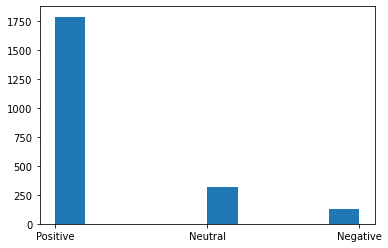

In [51]:
plt.hist(df["Sentiment"])

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

In [56]:
vader_scores = []
for index in range(len(df["Reviews"])):
    score = sid.polarity_scores(df["Reviews"][index])
    if score["pos"] > score["neg"]:
        vader_scores.append("Positive")
    elif score["pos"] < score["neg"]:
        vader_scores.append("Negative")
    else:
        vader_scores.append("Neutral")

df["Sentiment_VADER"] = vader_scores
df    

,Reviews,Sentiment,Sentiment_VADER
0,love my echo,Positive,Positive
1,loved it,Positive,Positive
2,sometimes while playing a game you can answer ...,Positive,Positive
3,i have had a lot of fun with this thing my 4 y...,Positive,Positive
4,music,Neutral,Neutral
...,...,...,...
2238,listening to music searching locations checkin...,Neutral,Neutral
2239,i do love these things i have them running my ...,Positive,Positive
2240,only complaint i have is that the sound qualit...,Negative,Positive
2241,nice little unit no issue,Neutral,Positive


(array([1883.,    0.,    0.,    0.,    0.,  183.,    0.,    0.,    0.,
         177.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

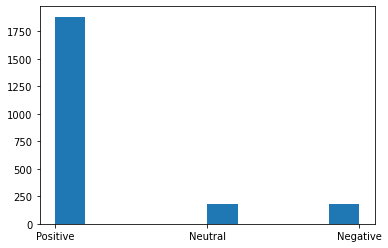

In [57]:
plt.hist(df["Sentiment_VADER"])

## Emotion Mining

In [58]:
pip install text2emotion

Note: you may need to restart the kernel to use updated packages.


In [59]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ips29\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ips29\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ips29\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
emotion_list = []
for line in df["Reviews"]:
    emotion_list.append(te.get_emotion(line))

In [61]:
var = list(emotion_list[0].keys())
for item in var:
    df[item] = [x[item] for x in emotion_list]
df

,Reviews,Sentiment,Sentiment_VADER,Happy,Angry,Surprise,Sad,Fear
0,love my echo,Positive,Positive,1.00,0.00,0.00,0.00,0.00
1,loved it,Positive,Positive,1.00,0.00,0.00,0.00,0.00
2,sometimes while playing a game you can answer ...,Positive,Positive,0.00,0.17,0.33,0.17,0.33
3,i have had a lot of fun with this thing my 4 y...,Positive,Positive,0.33,0.00,0.17,0.17,0.33
4,music,Neutral,Neutral,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
2238,listening to music searching locations checkin...,Neutral,Neutral,0.33,0.00,0.00,0.00,0.67
2239,i do love these things i have them running my ...,Positive,Positive,0.13,0.00,0.27,0.20,0.40
2240,only complaint i have is that the sound qualit...,Negative,Positive,0.27,0.00,0.18,0.27,0.27
2241,nice little unit no issue,Neutral,Positive,0.50,0.00,0.00,0.00,0.50


<AxesSubplot:>

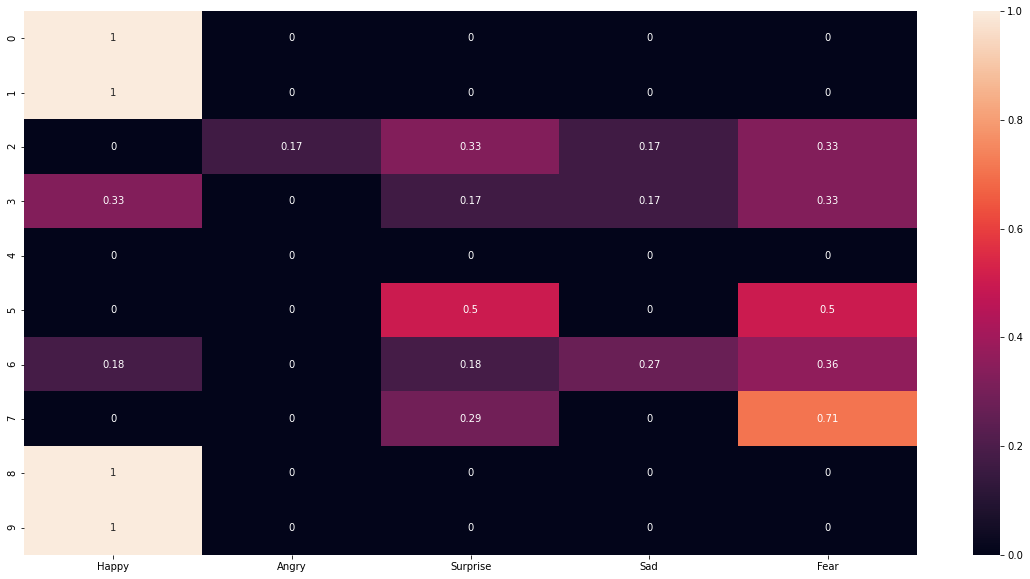

In [62]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(df.iloc[:10,3:], annot=True)